# Library

In [206]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, log_loss, roc_curve, auc

# Load Data

In [207]:
df = pd.read_csv('data.csv', sep=',', index_col='PassengerId')
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


# Data Processing

In [208]:
df = df.drop(columns=['Name', 'Ticket', 'Cabin'])

In [209]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
887,0,2,male,27.0,0,0,13.0000,S
888,1,1,female,19.0,0,0,30.0000,S
889,0,3,female,NaN,1,2,23.4500,S


In [210]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.6+ KB


In [211]:
df = df.dropna()

In [212]:
df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [213]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,0.404494,2.240169,29.642093,0.514045,0.432584,34.567251
std,0.491139,0.836854,14.492933,0.930692,0.854181,52.938648
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,20.000000,0.000000,0.000000,8.050000
50%,0.000000,2.000000,28.000000,0.000000,0.000000,15.645850
75%,1.000000,3.000000,38.000000,1.000000,1.000000,33.000000
max,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


# Exploratory Data Analysis

In [214]:
df_copy = df.copy()

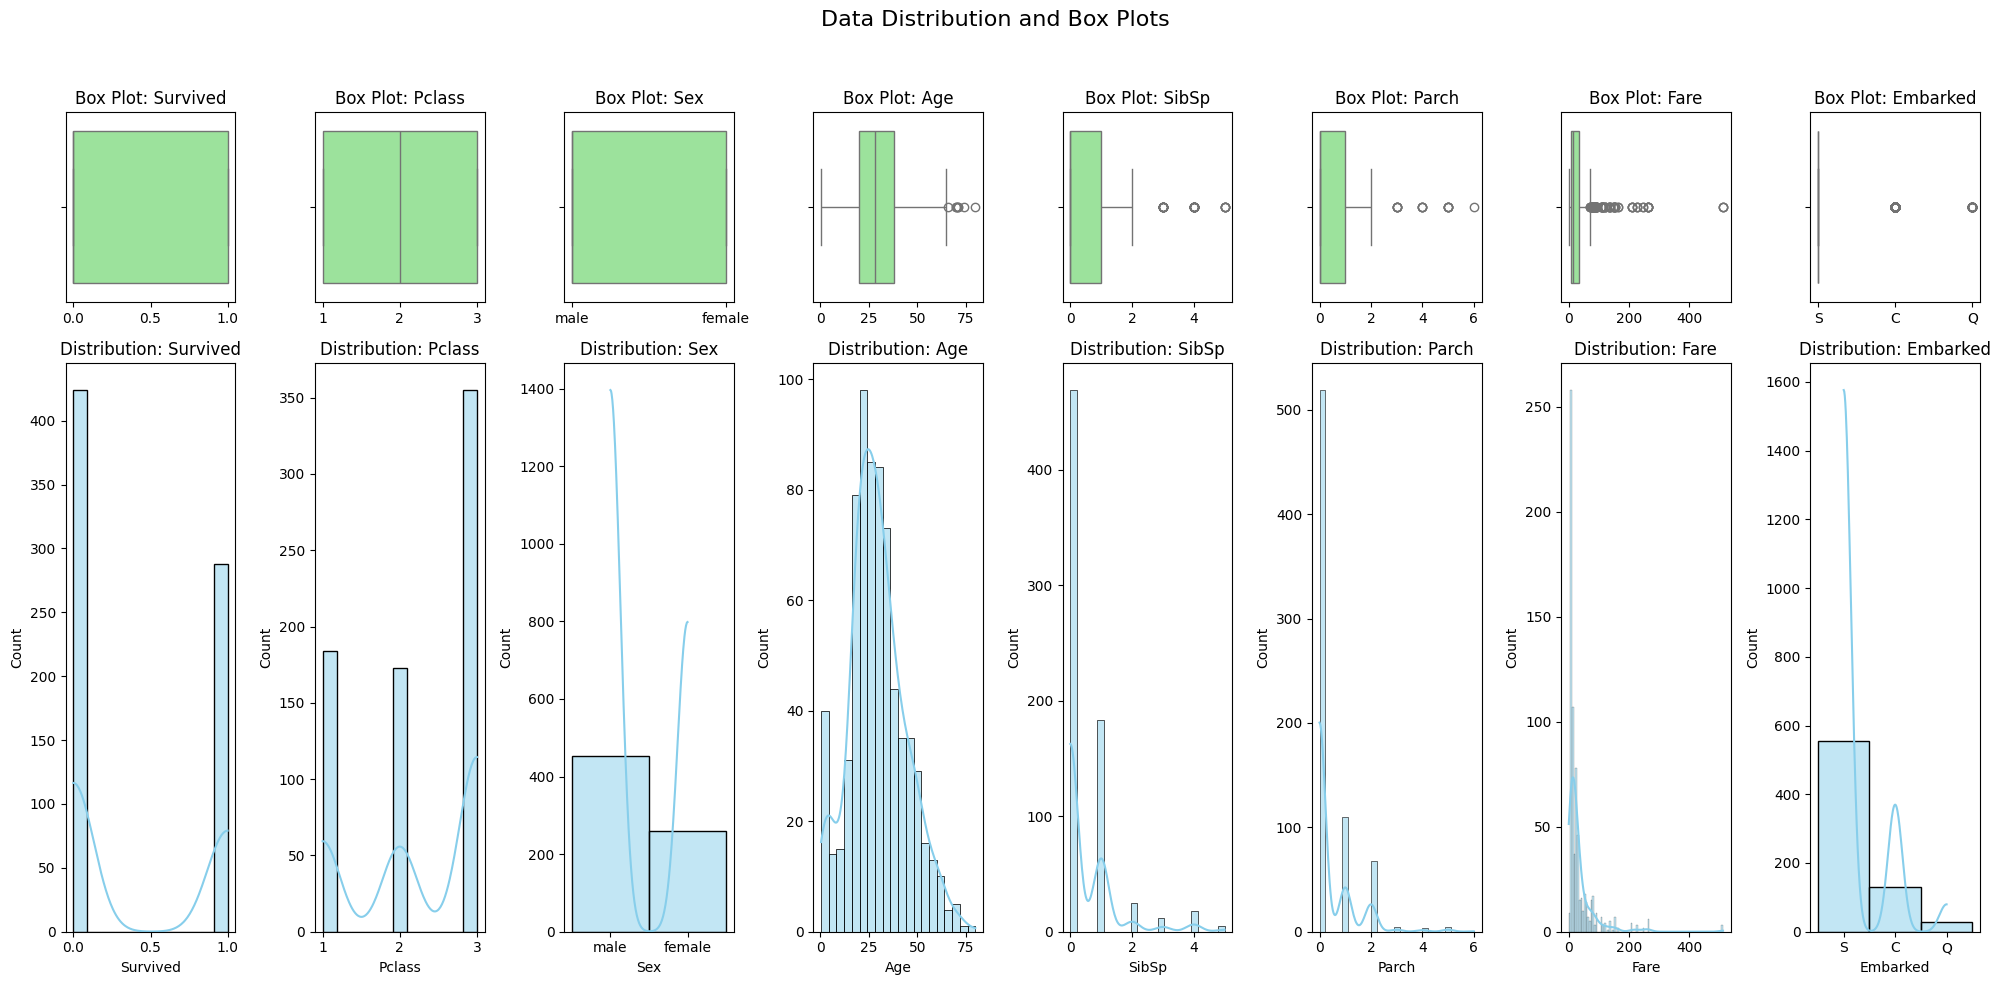

In [215]:
fig, axes = plt.subplots(2, len(df.columns), figsize=(20, 10), gridspec_kw={'height_ratios': [1, 3]})

# Loop through each column to create subplots
for i, column in enumerate(df.columns):
    # Box plot (top)
    sns.boxplot(x=df[column], ax=axes[0, i], color="lightgreen")
    axes[0, i].set(title=f"Box Plot: {column}", xlabel="", ylabel="")

    # Histogram (bottom)
    sns.histplot(df[column], kde=True, ax=axes[1, i], color="skyblue")
    axes[1, i].set(title=f"Distribution: {column}", xlabel=column, ylabel="Count")

# Adjust layout
plt.suptitle("Data Distribution and Box Plots", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# Data Splitting

In [216]:
X = df.drop(columns='Survived')
y = df['Survived']

In [217]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
1,3,male,22.0,1,0,7.2500,S
2,1,female,38.0,1,0,71.2833,C
3,3,female,26.0,0,0,7.9250,S
4,1,female,35.0,1,0,53.1000,S
5,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,3,female,39.0,0,5,29.1250,Q
887,2,male,27.0,0,0,13.0000,S
888,1,female,19.0,0,0,30.0000,S


In [218]:
y

PassengerId
1      0
2      1
3      1
4      1
5      0
      ..
886    0
887    0
888    1
890    1
891    0
Name: Survived, Length: 712, dtype: int64

# Data Engineering

In [219]:
X['Fare'] = np.log1p(X['Fare'])  # Use log1p to handle zeros gracefully

In [220]:
# Columns for specific transformations
categorical_columns = ['Sex', 'Embarked']
age_column = ['Age']
fare_column = ['Fare']

# Define scalers for individual numerical columns
scaler_age = StandardScaler()
scaler_fare = MinMaxScaler()

# Define the ColumnTransformer
ct = ColumnTransformer(
    transformers=[
        ('age_scaler', scaler_age, age_column),                 # Standard scaling for Age
        ('fare_scaler', scaler_fare, fare_column),             # Min-Max scaling for Fare
        ('encoder', OneHotEncoder(drop='first'), categorical_columns)  # One-hot encoding for categorical columns
    ],
    remainder='passthrough'  # Keep other columns unchanged (e.g., 'Survived')
)

# Transform the data and store it back to X
X = np.array(ct.fit_transform(X))

In [221]:
X

array([[-0.52766856,  0.33812548,  1.        , ...,  3.        ,
         1.        ,  0.        ],
       [ 0.57709388,  0.68589165,  0.        , ...,  1.        ,
         1.        ,  0.        ],
       [-0.25147795,  0.3507267 ,  0.        , ...,  3.        ,
         0.        ,  0.        ],
       ...,
       [-0.73481151,  0.55023757,  0.        , ...,  1.        ,
         0.        ,  0.        ],
       [-0.25147795,  0.55023757,  1.        , ...,  1.        ,
         0.        ,  0.        ],
       [ 0.16280796,  0.34755367,  1.        , ...,  3.        ,
         0.        ,  0.        ]])

In [222]:
y

PassengerId
1      0
2      1
3      1
4      1
5      0
      ..
886    0
887    0
888    1
890    1
891    0
Name: Survived, Length: 712, dtype: int64

# Train-Test Split

In [223]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training

In [224]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

# Prediction

In [225]:
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Evaluation

accuacy 0.8111888111888111 
 precision 0.86 recall 0.6825396825396826 f1 0.7610619469026548 logloss <function log_loss at 0x000001CC7D129BC0>


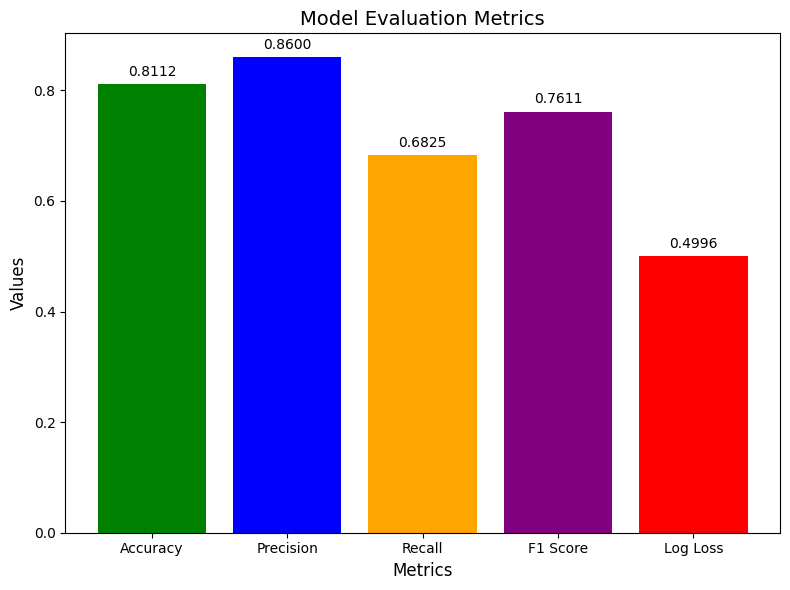

In [ ]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)

# Precision
precision = precision_score(y_test, y_pred)

# Recall
recall = recall_score(y_test, y_pred)

# F1 Score
f1 = f1_score(y_test, y_pred)

# Log Loss
log_loss_value = log_loss(y_test, y_pred_proba)

print('accuacy', accuracy, '\n', 'precision', precision, 'recall', recall, 'f1', f1, 'logloss', log_loss)

# Define the metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'Log Loss']
values = [accuracy, precision, recall, f1, log_loss_value]
d
# Create a bar chart
plt.figure(figsize=(8, 6))
plt.bar(metrics, values, color=['green', 'blue', 'orange', 'purple', 'red'])

# Add titles and labels
plt.title('Model Evaluation Metrics', fontsize=14)
plt.xlabel('Metrics', fontsize=12)
plt.ylabel('Values', fontsize=12)

# Display values on top of bars
for i, v in enumerate(values):
    plt.text(i, v + 0.01, f'{v:.4f}', ha='center', va='bottom', fontsize=10)

# Apply tight layout
plt.tight_layout()

# Show the plot
plt.show()

# Confusion Matrix

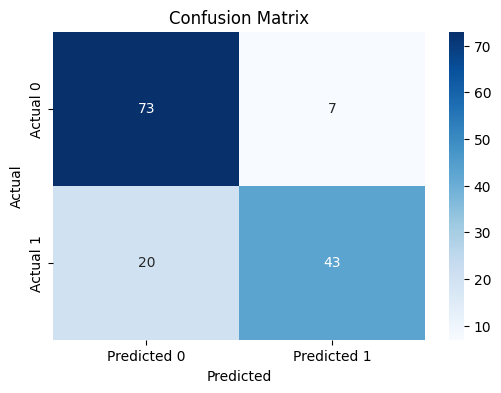

In [227]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve and AUC Graph

In [228]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

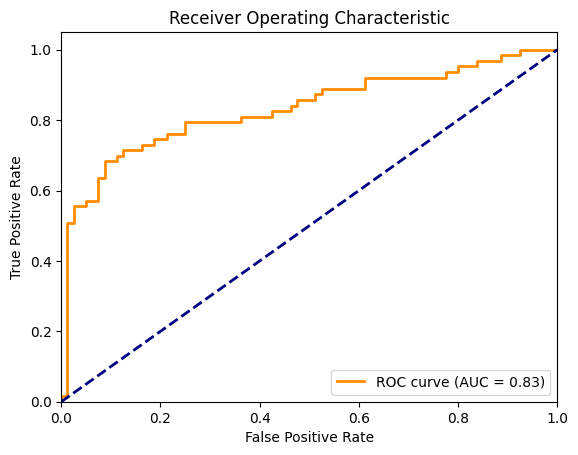

In [229]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()